# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [6]:
# next load the data
from pathlib import Path

df = pd.read_csv(r"E:\BISI\Machine learning\Project\Real_Estate_Solution\data\final.csv")
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,0,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,0,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [7]:
df.tail()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1858,760000,2008,881,249,5,5,7842,2003,436035,1,0,0,5,1,0
1859,690000,2015,1553,473,5,6,6501,1956,23086,1,0,0,59,1,0
1860,600000,1999,942,287,5,6,7064,1995,217800,1,0,0,4,1,0
1861,759900,2009,803,245,5,6,7500,2006,8886,1,0,0,3,1,0
1862,735000,2015,1459,444,5,6,7515,1958,10497,1,0,0,57,1,0


In [8]:
df.shape

(1863, 15)

## Linear Regression Model

In [9]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [10]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [14]:
# import module
from sklearn.model_selection import train_test_split



In [17]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=x.property_type_Bunglow)
x_train.property_type_Bunglow.value_counts()

property_type_Bunglow
1    849
0    641
Name: count, dtype: int64

In [18]:
x_train.head()

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1556,2013,638,181,4,4,6078,2013,10454,1,0,1,0,1,0
1132,2004,418,118,4,2,3373,2004,7566,1,0,0,0,1,0
1046,2003,409,124,4,2,1915,1985,10441,1,0,0,18,1,0
675,2008,352,100,3,2,2564,2008,2922,1,0,0,0,0,1
209,2005,204,62,2,2,1070,1988,0,1,1,0,17,0,1


In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 14), (1490,), (373, 14), (373,))

In [20]:
# train your model
model = LinearRegression()
lrmodel = model.fit(x_train, y_train)

In [21]:
lrmodel.coef_

array([ 7.91719413e+03,  1.51675235e+00,  1.59011041e+03,  1.07222920e+03,
        8.59978080e+02,  5.97719697e+00,  4.56145737e+03,  1.37385994e-01,
       -5.70490780e+03, -9.91860194e+03, -4.51535946e+04,  3.35573676e+03,
        9.31391574e+03, -9.31391574e+03])

In [22]:
lrmodel.intercept_

-24817900.27726535

In [23]:
x_train.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1556,2013,638,181,4,4,6078,2013,10454,1,0,1,0,1,0


In [24]:
# make preditions on train set
train_pred = lrmodel.predict(x_train)

In [25]:
train_pred

array([594352.74035626, 408402.78514439, 375428.40598715, ...,
       460963.3132211 , 670962.37169148, 398394.55696652])

In [26]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 83841.625614932


In [27]:
lrmodel.coef_

array([ 7.91719413e+03,  1.51675235e+00,  1.59011041e+03,  1.07222920e+03,
        8.59978080e+02,  5.97719697e+00,  4.56145737e+03,  1.37385994e-01,
       -5.70490780e+03, -9.91860194e+03, -4.51535946e+04,  3.35573676e+03,
        9.31391574e+03, -9.31391574e+03])

In [28]:
lrmodel.intercept_

-24817900.27726535

In [29]:
# make predictions om test set
ypred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 86080.75844334977


### Our model is still not good beacuse we need a model with Mean Absolute Error < $70,000

Note - We have not scaled the features and not tuned the model.

## Decision Tree Model

In [30]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [31]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [32]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [33]:
# make predictions using the test set
ytrain_pred = dtmodel.predict(x_train)

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

62737.67410602899

In [34]:
# make predictions using the test set
ytest_pred = dtmodel.predict(x_test)

In [35]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

65656.40770232525

## How do I know if my model is Overfitting or Generalised?

In [36]:
# make predictions on train set
ytrain_pred = dtmodel.predict(x_train)

In [37]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

62737.67410602899

## Plot the tree

In [38]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Bunglow', 'property_type_Condo'],
      dtype=object)

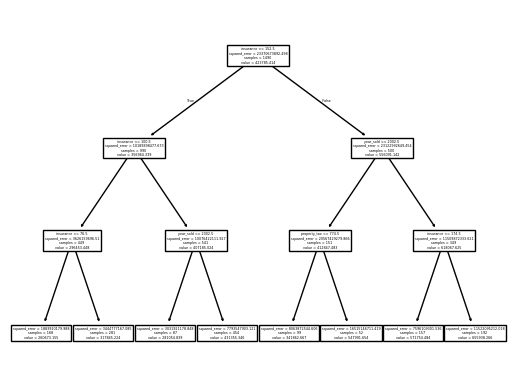

In [39]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

## Random Forest Model

In [40]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor

In [41]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [42]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [43]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [44]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)

In [45]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

44355.064316353884

In [46]:
# Individual Decision Trees
# tree.plot_tree(rfmodel.estimators_[2], feature_names=dtmodel.feature_names_in_)

## Pickle:

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [47]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(dtmodel, open('RE_Model','wb'))

In [50]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [52]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 1, 0]])

c:\Users\reach\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([260673.1547619])

In [53]:
x_test.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
711,2006,245,75,3,3,1280,1972,1589,1,0,0,34,0,1


In [51]:
print(RE_Model.feature_names_in_)

['year_sold' 'property_tax' 'insurance' 'beds' 'baths' 'sqft' 'year_built'
 'lot_size' 'basement' 'popular' 'recession' 'property_age'
 'property_type_Bunglow' 'property_type_Condo']
